<a href="https://colab.research.google.com/github/LeonardoCechellaVelho/machine-learning/blob/master/regressao_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files  #biblioteca utilizada para carregar os dados para o google colab
uploaded = files.upload()

Saving Dataset_Titanic.csv to Dataset_Titanic (3).csv


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
nome_arquivo = "Dataset_Titanic.csv"
data_frame = pd.read_csv(nome_arquivo, sep=',')

In [ ]:
data_frame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data_frame.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
from sklearn import preprocessing

In [ ]:
fare_scaled = preprocessing.scale(data_frame['Fare'])

In [ ]:
fare_scaled

array([-5.02445171e-01,  7.86845294e-01, -4.88854258e-01,  4.20730236e-01,
       -4.86337422e-01, -4.78116429e-01,  3.95813561e-01, -2.24083121e-01,
       -4.24256141e-01, -4.29555021e-02, -3.12172378e-01, -1.13845709e-01,
       -4.86337422e-01, -1.87093118e-02, -4.90279793e-01, -3.26266659e-01,
       -6.19988892e-02, -3.86670720e-01, -2.85997284e-01, -5.02948539e-01,
       -1.24919787e-01, -3.86670720e-01, -4.86756223e-01,  6.63597416e-02,
       -2.24083121e-01, -1.64441595e-02, -5.02948539e-01,  4.64700108e+00,
       -4.89776426e-01, -4.89442190e-01, -9.02720170e-02,  2.30172882e+00,
       -4.92377828e-01, -4.37007438e-01,  1.00606170e+00,  3.98582080e-01,
       -5.02863973e-01, -4.86337422e-01, -2.85997284e-01, -4.22073541e-01,
       -4.57645492e-01, -2.25593223e-01, -4.89442190e-01,  1.88762532e-01,
       -4.89776426e-01, -4.86337422e-01, -3.36334002e-01, -4.92377828e-01,
       -2.11917743e-01, -2.90024222e-01,  1.50673744e-01, -4.91371093e-01,
        8.96496787e-01, -

In [ ]:
data_frame['fare_scaled'] = fare_scaled

In [ ]:
data_frame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fare_scaled
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,-0.502445
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.786845
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,-0.488854
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.420730
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,-0.486337


In [ ]:
min_fare = data_frame['Fare'].min()

In [ ]:
max_fare = data_frame['Fare'].max()

In [ ]:
data_frame['normalized_fare'] = data_frame['Fare'].apply(lambda x: ((x-min_fare)/(max_fare-min_fare)))

In [ ]:
data_frame['normalized_fare'].max()

1.0

In [ ]:
min_max = preprocessing.MinMaxScaler()

In [ ]:
one_hot = pd.get_dummies(data_frame['Sex'])

In [ ]:
data_frame = data_frame.join(one_hot)

In [ ]:
data_frame.isnull().sum() * 100 / 891

PassengerId         0.000000
Survived            0.000000
Pclass              0.000000
Name                0.000000
Sex                 0.000000
Age                19.865320
SibSp               0.000000
Parch               0.000000
Ticket              0.000000
Fare                0.000000
Cabin              77.104377
Embarked            0.224467
fare_scaled         0.000000
normalized_fare     0.000000
female              0.000000
male                0.000000
dtype: float64

In [ ]:
mean_age = data_frame['Age'].mean()

In [ ]:
mean_age

29.69911764705882

In [ ]:
data_frame['Age'].fillna(mean_age, inplace=True)

In [ ]:
import seaborn as sns

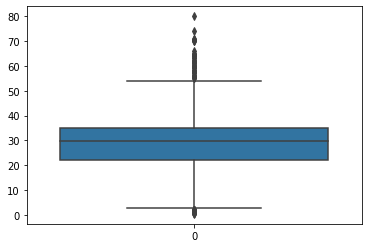

In [ ]:
ax = sns.boxplot(data=data_frame['Age'])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
x = data_frame[['Age', 'Fare']]

In [ ]:
y = data_frame['Survived']

In [ ]:
model = LogisticRegression(random_state= 0).fit(x, y)

In [ ]:
pred = model.predict(x)

In [ ]:
model.score(x,y)

0.6565656565656566

In [ ]:
print('Y = {} X = {}'.format(model.coef_,model.intercept_))

Y = [[-0.01032814  1.21442419 -1.15065692  0.57307773]] X = [0.0631568]


In [ ]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
corr_pearson = x.apply(lambda x : x.corr(y, method='pearson'))

In [ ]:
ind_pearson = np.argsort(corr_pearson)

In [ ]:
print(corr_pearson[ind_pearson])

Age    -0.069809
Fare    0.257307
dtype: float64


In [ ]:
mt_corr_pearson = data_frame.corr(method='pearson')

In [ ]:
mt_corr_pearson.style.background_gradient(cmap='coolwarm').set_precision(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,fare_scaled,normalized_fare,female,male
PassengerId,1.00,-0.01,-0.04,0.03,-0.06,-0.00,0.01,0.01,0.01,-0.04,0.04
Survived,-0.01,1.00,-0.34,-0.07,-0.04,0.08,0.26,0.26,0.26,0.54,-0.54
Pclass,-0.04,-0.34,1.00,-0.33,0.08,0.02,-0.55,-0.55,-0.55,-0.13,0.13
Age,0.03,-0.07,-0.33,1.00,-0.23,-0.18,0.09,0.09,0.09,-0.08,0.08
SibSp,-0.06,-0.04,0.08,-0.23,1.00,0.41,0.16,0.16,0.16,0.11,-0.11
Parch,-0.00,0.08,0.02,-0.18,0.41,1.00,0.22,0.22,0.22,0.25,-0.25
Fare,0.01,0.26,-0.55,0.09,0.16,0.22,1.00,1.00,1.00,0.18,-0.18
fare_scaled,0.01,0.26,-0.55,0.09,0.16,0.22,1.00,1.00,1.00,0.18,-0.18
normalized_fare,0.01,0.26,-0.55,0.09,0.16,0.22,1.00,1.00,1.00,0.18,-0.18
female,-0.04,0.54,-0.13,-0.08,0.11,0.25,0.18,0.18,0.18,1.00,-1.00


In [ ]:
corr_spearman = x.apply(lambda x : x.corr(y, method='spearman'))

In [ ]:
ind_spearman = np.argsort(corr_spearman)

In [ ]:
print(corr_spearman[ind_spearman])

Age    -0.039109
Fare    0.323736
dtype: float64


In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
model_RFE = LogisticRegression()

In [ ]:
rfe = RFE(model_RFE,2)

In [ ]:
fit = rfe.fit(x,y)

In [ ]:
print("Numero de caracteristicas", fit.n_features_)

Numero de caracteristicas 2


In [ ]:
print("Caracteristicas selecionadas", fit.support_)

Caracteristicas selecionadas [ True  True]


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model_arv = XGBClassifier()

In [ ]:
model_arv.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_predict = model_arv.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
acc = accuracy_score(y_test, y_predict)

In [ ]:
acc

0.6946778711484594

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=1)

In [ ]:
pca.fit(data_frame[['Fare', 'Age']])

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
fare_age = pca.transform(x[['Fare', 'Age']])

In [ ]:
x['fare_age'] = fare_age

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
x.drop(['Age', 'Fare'], axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
x

,fare_age
0,-25.143783
1,39.279465
2,-24.366234
3,21.025089
4,-24.010039
...,...
886,-19.267217
887,-2.478372
888,-8.751318
889,-2.298521


In [ ]:
import seaborn as sns

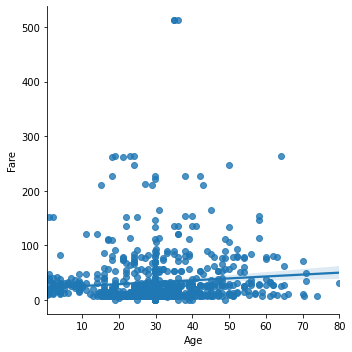

In [ ]:
sns.lmplot(x="Age", y="Fare", data=data_frame)